Learned Weight w: 3.2208467041941486
Learned Bias b: -11.099021907870167
Final Loss: 0.06422285056867093

Prediction Table:
   hours  true_label  z = w*x + b  probability  predicted_class
0    1.0           0      -7.8782       0.0004                0
1    2.0           0      -4.6573       0.0094                0
2    3.0           0      -1.4365       0.1921                0
3    4.0           1       1.7844       0.8562                1
4    5.0           1       5.0052       0.9933                1
5    6.0           1       8.2261       0.9997                1


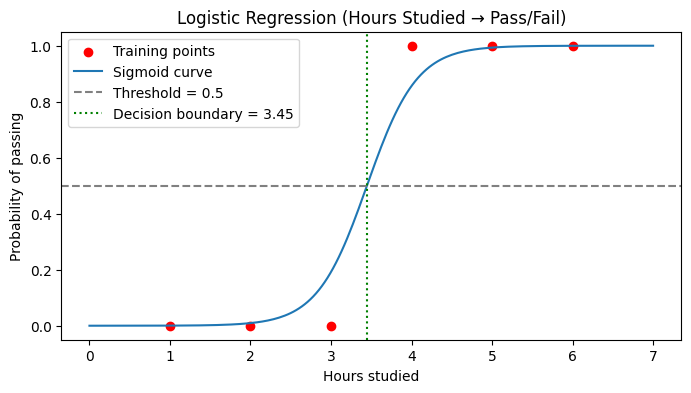

In [2]:
# -----------------------------
# Logistic Regression Example
# Hours Studied -> Pass (1) / Fail (0)
# -----------------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Dataset
X = np.array([1., 2., 3., 4., 5., 6.])[:, None]  # feature: hours studied
y = np.array([0,   0,   0,   1,   1,   1])       # label: fail/pass

# 2. Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 3. Initialize parameters
w = 0.0
b = 0.0

# Hyperparameters
lr = 0.1         # learning rate
n_iters = 5000   # number of iterations

loss_history = []

# 4. Train using Gradient Descent
for i in range(n_iters):
    z = w * X.flatten() + b
    preds = sigmoid(z)

    # cross-entropy loss
    loss = - np.mean(y * np.log(preds + 1e-12) + (1-y)*np.log(1-preds + 1e-12))
    loss_history.append(loss)

    # gradients
    dw = np.mean((preds - y) * X.flatten())
    db = np.mean(preds - y)

    # update parameters
    w -= lr * dw
    b -= lr * db

# 5. Final predictions
z_final = w * X.flatten() + b
probs = sigmoid(z_final)
pred_class = (probs > 0.5).astype(int)

# Prepare table
df = pd.DataFrame({
    "hours": X.flatten(),
    "true_label": y,
    "z = w*x + b": np.round(z_final, 4),
    "probability": np.round(probs, 4),
    "predicted_class": pred_class
})

print("Learned Weight w:", w)
print("Learned Bias b:", b)
print("Final Loss:", loss_history[-1])
print("\nPrediction Table:")
print(df)

# 6. Plot
xs = np.linspace(0, 7, 200)
zs = w * xs + b
sig_xs = sigmoid(zs)

plt.figure(figsize=(8,4))
plt.scatter(X.flatten(), y, color='red', label='Training points')
plt.plot(xs, sig_xs, label='Sigmoid curve')
plt.axhline(0.5, color='gray', linestyle='--', label='Threshold = 0.5')

# Decision boundary (where z=0)
x_boundary = -b/w
plt.axvline(x_boundary, color='green', linestyle=':', label=f"Decision boundary = {x_boundary:.2f}")

plt.xlabel("Hours studied")
plt.ylabel("Probability of passing")
plt.title("Logistic Regression (Hours Studied → Pass/Fail)")
plt.legend()
plt.show()


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv("diabetes_data.csv")
print("Dataset Preview:")
print(df.head())

# 2. Split features and labels
X = df.drop("disease", axis=1)
y = df["disease"]

# 3. Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 6. Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

# 7. Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Plot Probability Curve
plt.figure(figsize=(7,5))
plt.scatter(range(len(y_prob)), y_prob, label="Predicted probability")
plt.axhline(0.5, linestyle='--', color='red', label='Threshold = 0.5')
plt.title("Predicted Probability for Disease")
plt.xlabel("Test samples")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_data.csv'